In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from easygui import fileopenbox, filesavebox

In [2]:
plt.rcParams['figure.figsize'] = (16,9)

In [3]:
img_raw = cv2.imread(r"C:\Users\ENGLISH\OneDrive\pictures\IMG_20200424_020652.jpg")

In [7]:
img_raw.shape,type(img_raw)

((512, 512, 3), numpy.ndarray)

In [14]:
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

In [9]:
img_gray.shape

(512, 512)

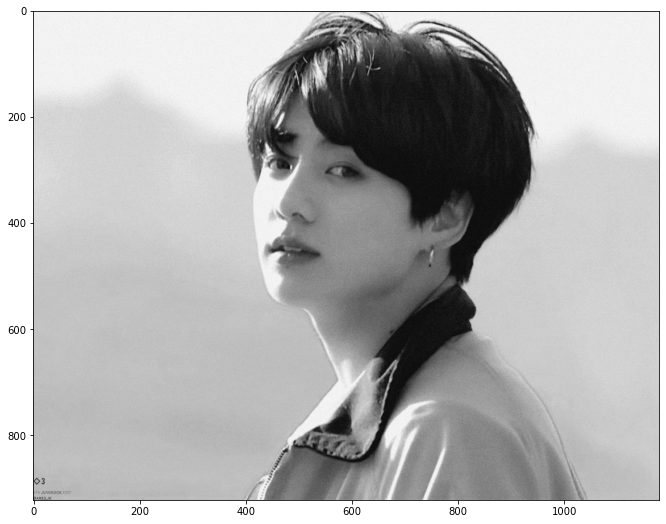

In [15]:
plt.imshow(img_gray, 'gray')
plt.show()

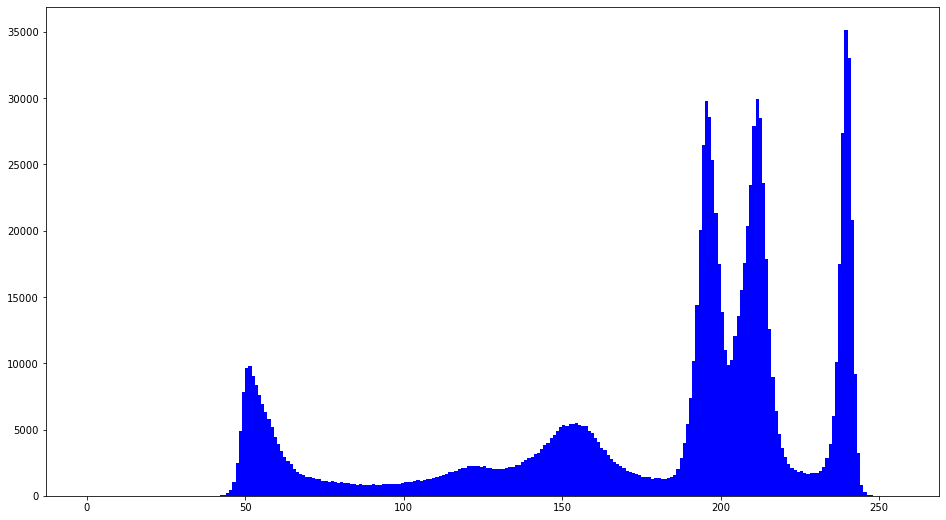

In [16]:
plt.hist(img_gray.flatten(),256,[0,256],color = 'b')
plt.show()

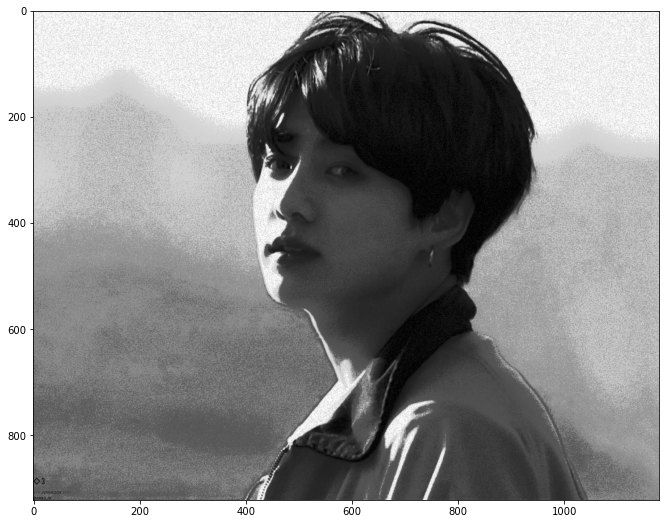

In [17]:
img_he = cv2.equalizeHist(img_gray)
plt.imshow(img_he, 'gray')
plt.show()

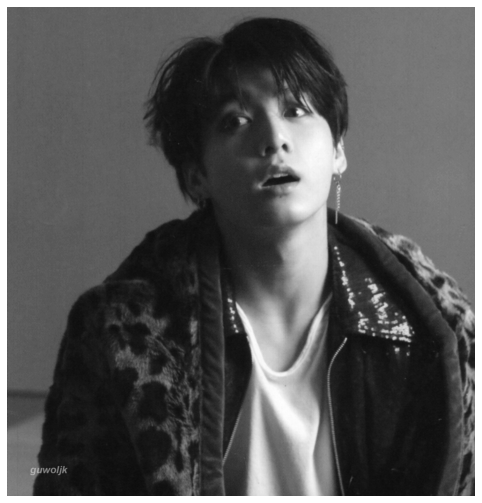

In [18]:
img_raw = cv2.imread(r"C:\Users\ENGLISH\OneDrive\pictures\IMG_20191017_002034.jpg")

img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, 'gray')
plt.axis('off')
plt.show()

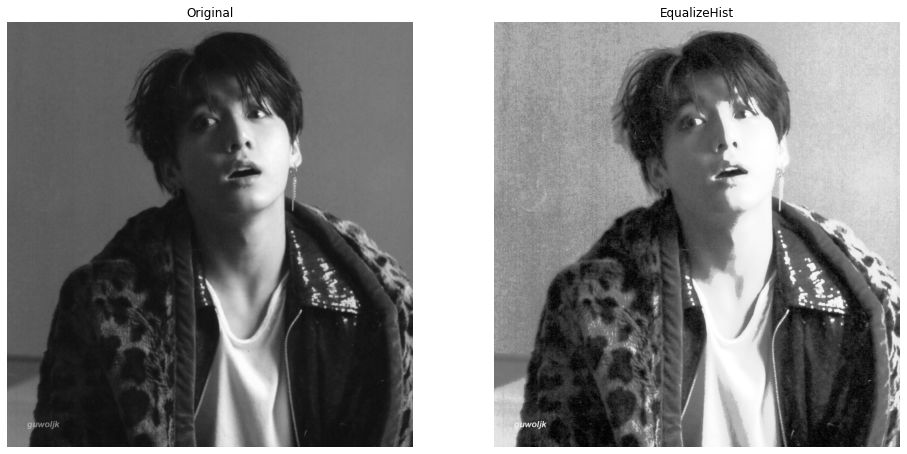

In [21]:
img_he = cv2.equalizeHist(img_gray)

title = ['Original', 'EqualizeHist']
images = [img_gray, img_he]
for i in range(len(images)):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.axis('off')
plt.show()

In [22]:
B = np.zeros(img_raw.shape, dtype = 'uint8')
G = B.copy()
R = B.copy()
B[:,:,0] = img_raw[:,:,0]
G[:,:,1] = img_raw[:,:,1]
R[:,:,2] = img_raw[:,:,2]

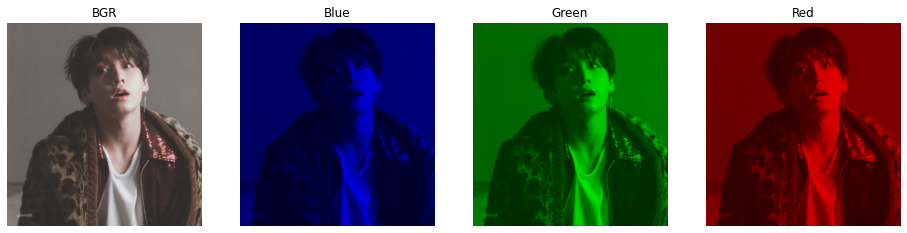

In [23]:
titles = ["BGR", "Blue", "Green", "Red"]
images = [img_raw, B, G, R]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,i+1),plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

In [28]:
img_raw = cv2.imread(r"C:\Users\ENGLISH\OneDrive\pictures\1566621084933.jpg")

In [29]:
img_ycc = cv2.cvtColor(img_raw, cv2.COLOR_BGR2YCrCb)

In [30]:
img_ycc[:,:,0] = cv2.equalizeHist(img_ycc[:,:,0])

img_rgb_he = cv2.cvtColor(img_ycc, cv2.COLOR_YCrCb2BGR)

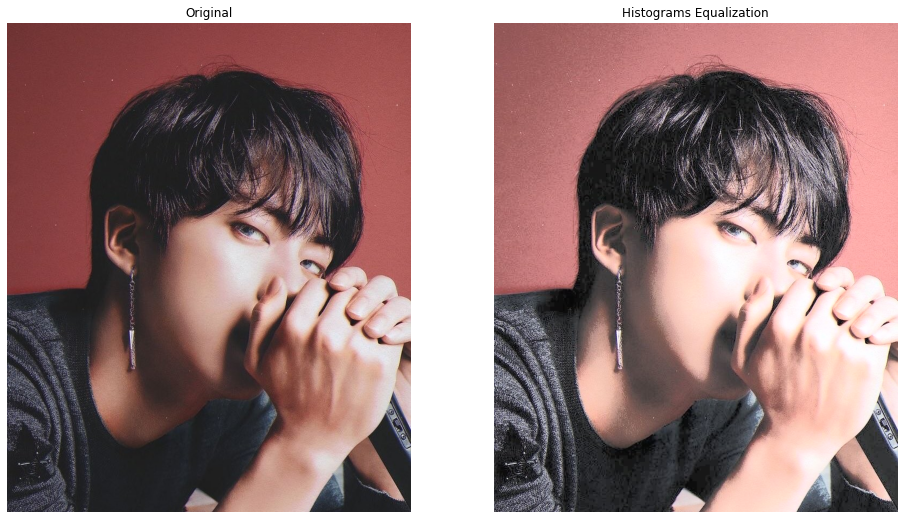

In [31]:
titles = ['Original', 'Histograms Equalization']
images = [img_raw, img_rgb_he]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,i+1),plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

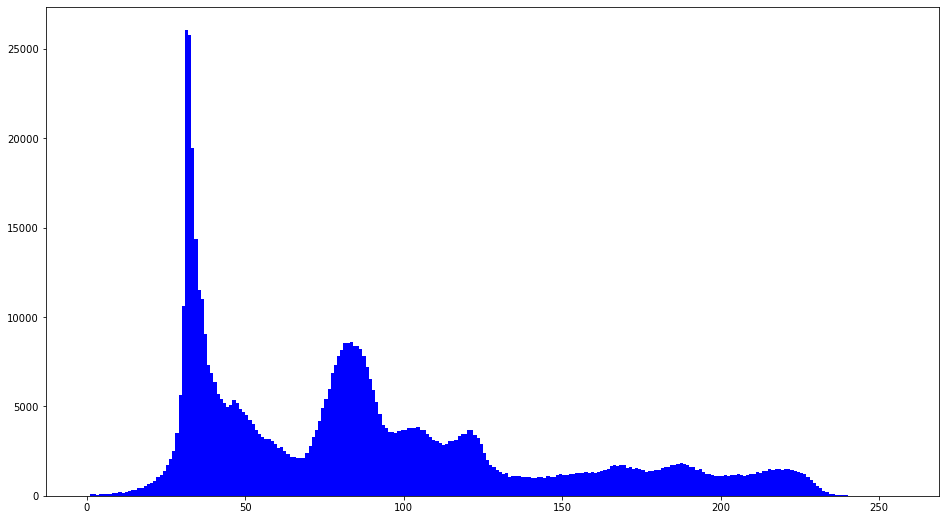

In [32]:
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.flatten(), 256, [0,256], color = 'b')
plt.show()

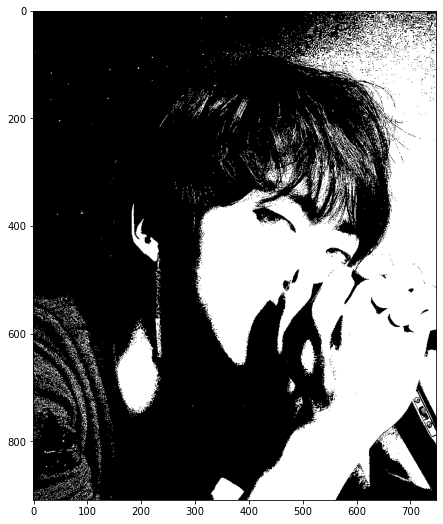

In [35]:
ret, thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, 'gray')
plt.show()

In [36]:
img_raw = cv2.imread(r"C:\Users\ENGLISH\Desktop\image_analayze\image03\image03\img2_1.jpg")

In [37]:
### 감마 보정 함수
def fn_gamma_correction(img, gamma=1):
    lookUpTable = np.empty((1, 256), np.uint8)
    for i in range(256) : 
        lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    img_gamma = cv2.LUT(img, lookUpTable)
    return img_gamma

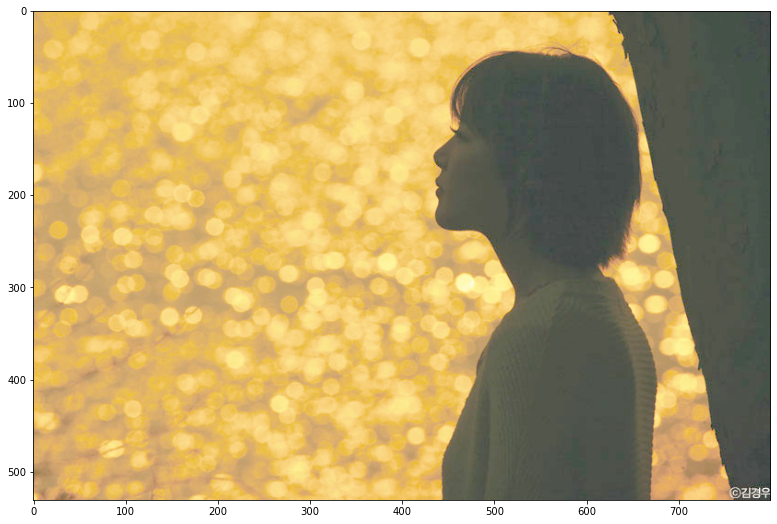

In [39]:
img_gamma = fn_gamma_correction(img_raw, 0.40)
img_rgb = cv2.cvtColor(img_gamma,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [6]:
file = r"C:\Users\ENGLISH\Desktop\image_analayze\image04\Intro - Walt Disney Pictures (Mickey Drive A Boat).mp4"
cap = cv2.VideoCapture(file)

while cv2.waitKey(20) < 0:
    #반복재생 설정
    if False & (cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT)):
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    
    ret, frame = cap.read()
    if ret:
        #영상처리 : 흑백처리
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #Frame 출력
        cv2.imshow("VideoFrame", frame)
    else:
        print("Can't receive frame. Exiting...")
        break

cap.release()
cv2.destroyAllWindows()

In [7]:
#반전 동영상 출력
file = r"C:\Users\ENGLISH\Desktop\image_analayze\image04\Intro - Walt Disney Pictures (Mickey Drive A Boat).mp4"
cap = cv2.VideoCapture(file)

while cv2.waitKey(20) < 0:
    ret, frame = cap.read()
    if ret:
        frame = cv2.convertScaleAbs(frame, alpha = -1, beta = 255)
        cv2.imshow("VideoFrame", frame)
    else:
        print("Can't receive frame.Exiting...")
        break
        
cap.release()
cv2.destroyAllWindows()

In [24]:
img_glass = cv2.imread(r"C:\Users\ENGLISH\OneDrive\pictures\IMG_20190630_012755.jpg")

img_gray = cv2.cvtColor(img_glass, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT,1 ,45,
                          param1 = 95, param2 = 30, minRadius = 60, maxRadius = 70)


In [25]:
circles = np.uint16(np.around(circles))

In [26]:
circles[0,:5]

array([[354, 330,  65],
       [500, 334,  63]], dtype=uint16)

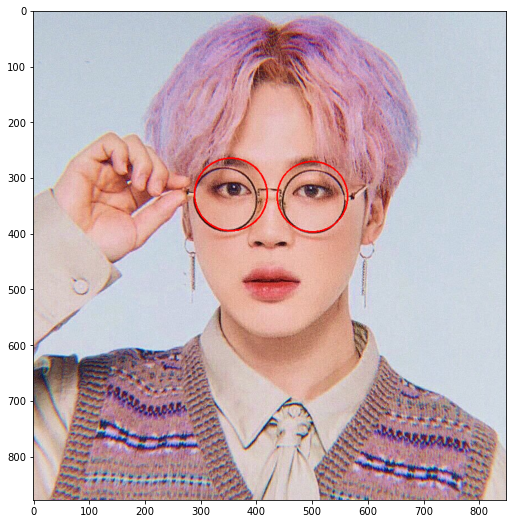

In [27]:
img_out = img_glass.copy()

for cx, cy, radius in circles[0,:]:
    cv2.circle(img_out, (cx, cy), int(radius), (0,0,255), 2)

plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
#동전 검출
img_coin = cv2.imread(r"C:\Users\ENGLISH\Downloads\image_6\coins.png")

img_gray = cv2.cvtColor(img_coin, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 50,
                          param1 = 145, param2 = 35, minRadius = 40, maxRadius = 80 )

circles = np.uint16(np.round(circles))

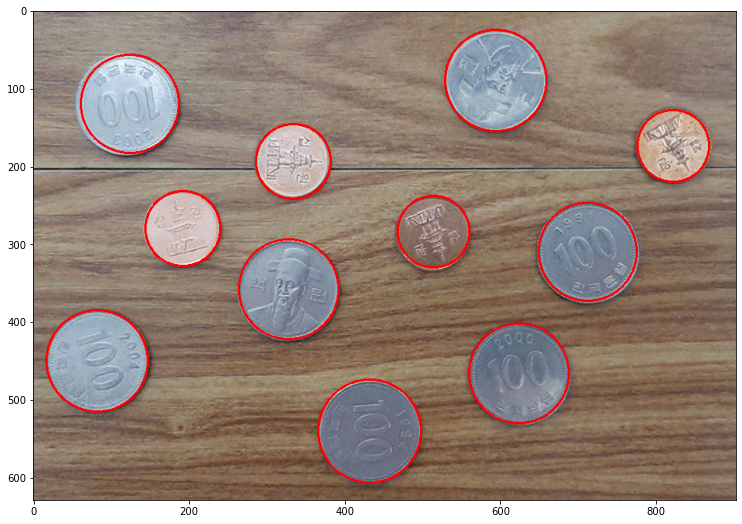

In [37]:
img_out = img_coin.copy()

for cx, cy, radius in circles[0,:]:
    cv2.circle(img_out, (cx, cy), int(radius), (0,0,255), 2)

plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
circles.shape

(1, 11, 3)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.family'] = 'Gulim'